In [2]:
import torch
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, IncrementalPCA

from check_lang import lang_checker_langdetect, id_to_en
from functions import *
from Preprocessing import *

# pd.options.mode.chained_assignment = None  # default='warn'

d:\GitHub\Jurnal-Clustering\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('data/data_sinta_cleaned_s1_translated.csv')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

df.title = df.title.apply(lambda x : x.lower())

df

,journal,title,abstract,data_cleaned,lang,label,translated
0,25024760,localization schemes in underwater sensor netw...,<jats:p>&lt;p&gt;Underwater Wireless Sensor Ne...,localization schemes in underwater sensor netw...,en,0,localization schemes in underwater sensor netw...
1,25024760,a review on voltage balancing solutions in mul...,<jats:p>&lt;p&gt;Multilevel inverters are used...,a review on voltage balancing solutions in mul...,en,0,a review on voltage balancing solutions in mul...
2,25024760,collision detection and trajectory planning fo...,<jats:p>This paper proposes an algorithm for C...,collision detection and trajectory planning fo...,en,0,collision detection and trajectory planning fo...
3,25024760,a new method for optimal coordination of overc...,<jats:p>&lt;p&gt;The most of the new protectiv...,a new method for optimal coordination of overc...,en,0,a new method for optimal coordination of overc...
4,25024760,fairness evaluation and comparison of current ...,<jats:p>Transmission Control Protocol (TCP) is...,fairness evaluation and comparison of current ...,en,0,fairness evaluation and comparison of current ...
...,...,...,...,...,...,...,...
56087,25409581,hesperitin synergistically promotes the senesc...,"<jats:p>Pentagamavunone-1 (PGV-1), a curcumin ...",hesperitin synergistically promotes the senesc...,en,0,hesperitin synergistically promotes the senesc...
56088,25409581,first report on wild occurrences of phoenix mu...,<jats:p>The genus Pleurotus is known as a comm...,first report on wild occurrences of phoenix mu...,en,0,first report on wild occurrences of phoenix mu...
56089,25409581,nannoplankton biostratigraphy from banggai-sul...,<jats:p>The nannoplankton research was conduct...,nannoplankton biostratigraphy from banggai-sul...,en,0,nannoplankton biostratigraphy from banggai-sul...
56090,25409581,spatial modelling habitat suitability of javan...,<jats:p>Javan Langur (T. auratus) is well-know...,spatial modelling habitat suitability of javan...,en,0,spatial modelling habitat suitability of javan...


In [3]:
df['data_cleaned'] = df.abstract.apply(preprocess_text)
df['data_cleaned'] = df.loc[:, ['title', 'data_cleaned']].apply(lambda x : '{} {}'.format(x[0], x[1]), axis = 1)  
df['lang'] = df.data_cleaned.apply(lang_checker_langdetect)

df = df[df.lang.isin(['en', 'id'])]
df['translated'] = df.loc[:, ['data_cleaned', 'lang']].apply(lambda x : x[0] if x[1] == 'en' else id_to_en(x[0]), axis = 1)
df['data_cleaned'] = df['translated']
df.loc[:, 'label'] = 0

df

,journal,title,abstract,data_cleaned,lang,label,translated
0,25024760,localization schemes in underwater sensor netw...,<jats:p>&lt;p&gt;Underwater Wireless Sensor Ne...,localization schemes in underwater sensor netw...,en,0,localization schemes in underwater sensor netw...
1,25024760,a review on voltage balancing solutions in mul...,<jats:p>&lt;p&gt;Multilevel inverters are used...,a review on voltage balancing solutions in mul...,en,0,a review on voltage balancing solutions in mul...
2,25024760,collision detection and trajectory planning fo...,<jats:p>This paper proposes an algorithm for C...,collision detection and trajectory planning fo...,en,0,collision detection and trajectory planning fo...
3,25024760,a new method for optimal coordination of overc...,<jats:p>&lt;p&gt;The most of the new protectiv...,a new method for optimal coordination of overc...,en,0,a new method for optimal coordination of overc...
4,25024760,fairness evaluation and comparison of current ...,<jats:p>Transmission Control Protocol (TCP) is...,fairness evaluation and comparison of current ...,en,0,fairness evaluation and comparison of current ...
...,...,...,...,...,...,...,...
56087,25409581,hesperitin synergistically promotes the senesc...,"<jats:p>Pentagamavunone-1 (PGV-1), a curcumin ...",hesperitin synergistically promotes the senesc...,en,0,hesperitin synergistically promotes the senesc...
56088,25409581,first report on wild occurrences of phoenix mu...,<jats:p>The genus Pleurotus is known as a comm...,first report on wild occurrences of phoenix mu...,en,0,first report on wild occurrences of phoenix mu...
56089,25409581,nannoplankton biostratigraphy from banggai-sul...,<jats:p>The nannoplankton research was conduct...,nannoplankton biostratigraphy from banggai-sul...,en,0,nannoplankton biostratigraphy from banggai-sul...
56090,25409581,spatial modelling habitat suitability of javan...,<jats:p>Javan Langur (T. auratus) is well-know...,spatial modelling habitat suitability of javan...,en,0,spatial modelling habitat suitability of javan...


In [4]:
df = df[df.lang.isin(['en'])]
df

,journal,title,abstract,data_cleaned,lang,label,translated
0,25024760,localization schemes in underwater sensor netw...,<jats:p>&lt;p&gt;Underwater Wireless Sensor Ne...,localization schemes in underwater sensor netw...,en,0,localization schemes in underwater sensor netw...
1,25024760,a review on voltage balancing solutions in mul...,<jats:p>&lt;p&gt;Multilevel inverters are used...,a review on voltage balancing solutions in mul...,en,0,a review on voltage balancing solutions in mul...
2,25024760,collision detection and trajectory planning fo...,<jats:p>This paper proposes an algorithm for C...,collision detection and trajectory planning fo...,en,0,collision detection and trajectory planning fo...
3,25024760,a new method for optimal coordination of overc...,<jats:p>&lt;p&gt;The most of the new protectiv...,a new method for optimal coordination of overc...,en,0,a new method for optimal coordination of overc...
4,25024760,fairness evaluation and comparison of current ...,<jats:p>Transmission Control Protocol (TCP) is...,fairness evaluation and comparison of current ...,en,0,fairness evaluation and comparison of current ...
...,...,...,...,...,...,...,...
56087,25409581,hesperitin synergistically promotes the senesc...,"<jats:p>Pentagamavunone-1 (PGV-1), a curcumin ...",hesperitin synergistically promotes the senesc...,en,0,hesperitin synergistically promotes the senesc...
56088,25409581,first report on wild occurrences of phoenix mu...,<jats:p>The genus Pleurotus is known as a comm...,first report on wild occurrences of phoenix mu...,en,0,first report on wild occurrences of phoenix mu...
56089,25409581,nannoplankton biostratigraphy from banggai-sul...,<jats:p>The nannoplankton research was conduct...,nannoplankton biostratigraphy from banggai-sul...,en,0,nannoplankton biostratigraphy from banggai-sul...
56090,25409581,spatial modelling habitat suitability of javan...,<jats:p>Javan Langur (T. auratus) is well-know...,spatial modelling habitat suitability of javan...,en,0,spatial modelling habitat suitability of javan...


In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_checkpoint = 'bert-base-cased'

bert_path = 'model/bert_pipeline3_3_123.pt'
model_bert = BertClassifierEmbed(123, model_checkpoint)
checkpoint_bert = torch.load(bert_path)
model_bert.load_state_dict(checkpoint_bert)

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

<All keys matched successfully>

In [6]:
journal_type = 'pipeline_3_2'
journal_id = 'sinta_1'

file_path = os.path.join('src', journal_type)

if not os.path.exists(file_path):
    os.mkdir(file_path)

In [7]:
embeddings = embed(df, model_checkpoint, model_bert, device = device)
embeddings.shape

d:\GitHub\Jurnal-Clustering\venv\lib\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


(55961, 128, 768)

In [8]:
np.save(f"{file_path}/{journal_id}/bert_data.npy", embeddings.reshape(embeddings.shape[0], -1))

In [9]:
# Mengubah array embeddings menjadi matriks dua dimensi
X_ = embeddings.reshape(embeddings.shape[0], -1)

n = X_.shape[0] # how many rows we have in the X_set
chunk_size = 1000 # how many rows we feed to IPCA at a time, the divisor of n
ipca = IncrementalPCA(n_components=2, batch_size=16)

for i in range(0, n//chunk_size):
    ipca.partial_fit(X_[i*chunk_size : (i+1)*chunk_size])

ipca.partial_fit(X_[(i+1)*chunk_size:])


IncrementalPCA(batch_size=16, n_components=2)

In [10]:
import pickle as pk

pk.dump(ipca, open(f"{file_path}/{journal_id}/pca.pkl","wb"))


# # later reload the pickle file
# pca_reload = pk.load(open("pca.pkl",'rb'))
# result_new = pca_reload .transform(X)


In [11]:
X = ipca.transform(X_[0*chunk_size : (0+1)*chunk_size])

for i in range(1, n//chunk_size):
    X = np.append(X, ipca.transform(X_[i*chunk_size : (i+1)*chunk_size]), axis = 0)

X = np.append(X, ipca.transform(X_[(i+1)*chunk_size:]), axis=0)

In [12]:
# Perform KMeans clustering
num_clusters = 39
kmeans = KMeans(n_clusters=num_clusters, random_state=0, max_iter=1000)
kmeans.fit(X)

KMeans(max_iter=1000, n_clusters=39, random_state=0)

In [13]:
cluster_labels = kmeans.labels_

# Mendapatkan koordinat pusat cluster
centroids = kmeans.cluster_centers_

df['kmeans_labels'] = cluster_labels

# Menghitung jarak antara setiap titik data dengan centroid
jarak_ke_centroid = centroid_dist(kmeans, X)

# Menentukan batas jarak yang dianggap sebagai "outscoop"
threshold = outscoop_threshold(jarak_ke_centroid)

scoop_labels = np.ones(len(X))
scoop_labels[jarak_ke_centroid > threshold] = -1

save_data(journal_id, journal_type, kmeans, threshold, X, df[['data_cleaned', 'journal', 'lang']], scoop_labels)

print("Data sebaran PCA telah disimpan.")

C:\Users\rarmn\AppData\Local\Temp\ipykernel_5824\3228155535.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kmeans_labels'] = cluster_labels
d:\GitHub\Jurnal-Clustering\functions.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Label'] = scoop_labels


Data sebaran PCA telah disimpan.


In [14]:
test = embed(df[:5], model_checkpoint, model_bert, device = device)

# pca = PCA(n_components=2, random_state=0)

test = test.reshape(test.shape[0], -1)        
test = ipca.transform(test)

test, X[:5]

(array([[ -79.69546649,   16.63273039],
        [ -12.25065654, -106.44518126],
        [-101.35365093,   21.01293324],
        [ -55.03973911,  -45.80597374],
        [ -74.44447837,  -11.60450226]]),
 array([[ -79.6954579 ,   16.63273875],
        [ -12.25067015, -106.44515694],
        [-101.35367347,   21.01294277],
        [ -55.03973985,  -45.80598483],
        [ -74.44452812,  -11.60450373]]))

d:\GitHub\Jurnal-Clustering\functions.py:59: UserWarning: The palette list has more values (41) than needed (40), which may not be intended.
  plot = sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='plot_color', data=df_pca, palette=cluster_palette)


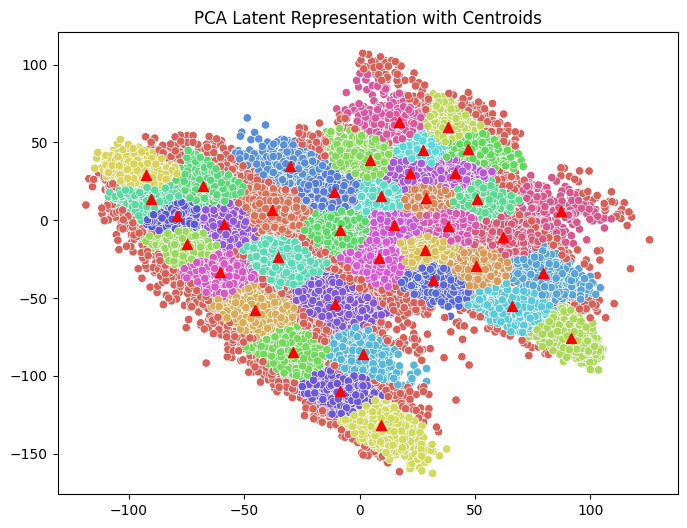

d:\GitHub\Jurnal-Clustering\functions.py:59: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  plot = sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='plot_color', data=df_pca, palette=cluster_palette)


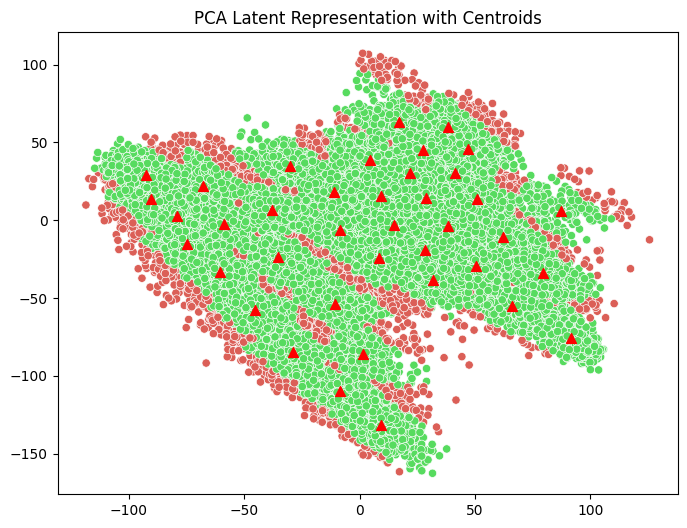

In [6]:
journal_type = 'pipeline_3_2'
journal_id = 'sinta_1'

kmeans, threshold, X, df_res = load_data(journal_id, journal_type)
# journal = list(df_res.journal.apply(lambda x : 1 if x == '25277456' else 0))
scoop_labels = list(df_res.Label)
lang = list(df_res.lang)
# journal = list(df_res.journal)

plot_vector_distribution(X, kmeans, scoop_labels, check_outscoop='True', lang = lang)

plot_vector_distribution(X, kmeans, scoop_labels, check_outscoop='focus', lang = lang)

In [1]:
df_res.journal.unique()

NameError: name 'df_res' is not defined

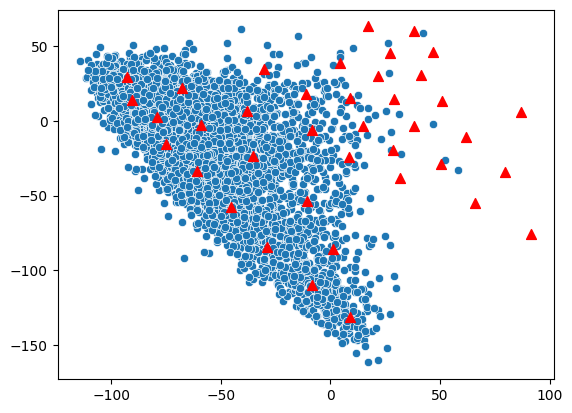

In [12]:
centroids = kmeans.cluster_centers_

index = df_res[df_res.journal == '25024760'].index

df_pca = pd.DataFrame(X[index], columns=['Dimension 1', 'Dimension 2'])
plot = sns.scatterplot(x='Dimension 1', y='Dimension 2', data=df_pca)
plot.set(xlabel = None)
plot.set(ylabel = None)
plot.legend([],[], frameon=False)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=50, label='Centroids')